In [36]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [37]:
import configparser
import os
from pathlib import Path

import aps
import aps.ai.autoalignment.beamline28IDB.optimization.analysis_utils as analysis
import aps.ai.autoalignment.beamline28IDB.optimization.common as opt_common
import joblib
import matplotlib.pyplot as plt
import numpy as np
import optuna
import scipy
from IPython.display import Image, display_png

%matplotlib inline

#### Reference best focus manual

In [38]:
exp_type = 'peak_lwsi'

In [39]:
#base_dir = Path(aps.__file__).parents[1]
#autoalign_dir = base_dir / f'work_directory/28-ID/AI/autoalignment/'
autoalign_dir = Path("/Users/skandel/Library/CloudStorage/Box-Box/Beamtime_28ID_Nov2022/AI/autofocusing")
data_base_dir = autoalign_dir / exp_type / 'denoised'
print(f'data base dir exists {data_base_dir.exists()}')


data base dir exists True


In [40]:
data_base_dir

PosixPath('/Users/skandel/Library/CloudStorage/Box-Box/Beamtime_28ID_Nov2022/AI/autofocusing/peak_lwsi/denoised')

### peak_lwsi_150_2022-11-19

In [41]:
!ls $data_base_dir

peal_lwsi_moo_150_2022-11-20_images
peal_lwsi_moo_150_2022-11-20_steps
peal_lwsi_moo_autofocusing.ini
peal_lwsi_moo_optimization_final_150_2022-11-20_07:12.gz


Reference best focus


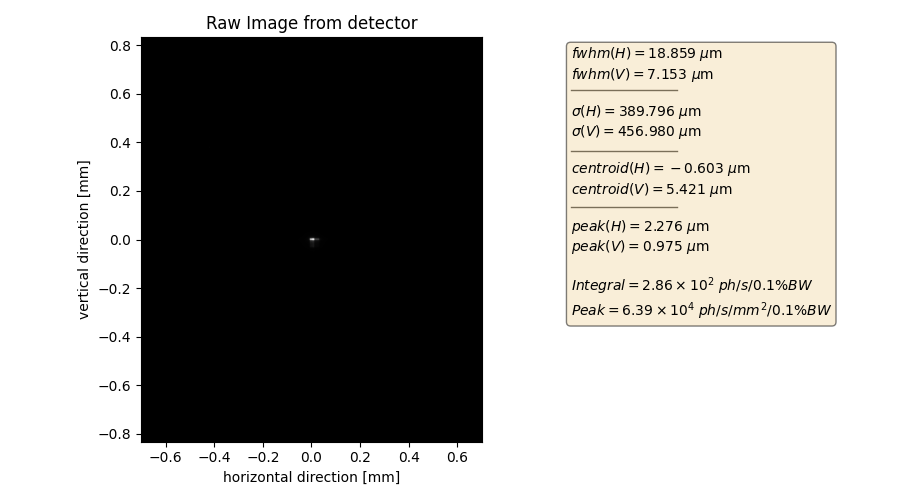

In [42]:
print("Reference best focus")
reference = Image(filename=autoalign_dir / 'Reference_Best_Focus_Manual.png')
display_png(reference)

#### Experiment results

In [43]:
!ls $data_base_dir

peal_lwsi_moo_150_2022-11-20_images
peal_lwsi_moo_150_2022-11-20_steps
peal_lwsi_moo_autofocusing.ini
peal_lwsi_moo_optimization_final_150_2022-11-20_07:12.gz


In [44]:
log_file = Path(data_base_dir / 'peal_lwsi_moo_optimization_final_150_2022-11-20_07:12.gz')
log_file.exists()

True

In [45]:
hist_dir = Path(data_base_dir / 'peal_lwsi_moo_150_2022-11-20_steps')
hist_dir.exists()

True

In [46]:
study = analysis.create_study_from_trials(log_file)

[I 2022-11-20 22:39:39,799] A new study created in memory with name: no-name-843713f3-a489-4055-8670-8435d09cd5c8


Assuming minimization for all objectives.


In [47]:
n_steps = len(study.trials)

In [48]:
hists = analysis.load_histograms_from_files(n_steps, hist_dir, extension='gz')

In [49]:
nash_trial, nash_idx, n_doms = analysis.select_nash_equil_trial_from_pareto_front(study)

In [50]:
print(n_doms)
print(nash_trial.number, nash_trial.values)
print(nash_trial.user_attrs["dw"].__dict__)

[92, 118, 129, 143]
130 [0.0022989984115618124, 16.213380482187677]
{'_DictionaryWrapper__dictionary': {'h_sigma': 0.2592247987066979, 'h_fwhm': 0.021459935155165866, 'h_centroid': 0.007810538182263085, 'h_peak': -0.00032515053265395866, 'v_sigma': 0.2560249884286016, 'v_fwhm': 0.023409144196953058, 'v_centroid': 0.03221293275219807, 'v_peak': 0.0022758890191480305, 'integral_intensity': 34.751775492574424, 'peak_intensity': 30326.582, 'gaussian_fit': {}}}


Trial number 53
Trial values: peak_distance 4.598e-04 lwsi 1.639e+01
Trial dw:
{'_DictionaryWrapper__dictionary': {'h_sigma': 0.26940061218893135, 'h_fwhm': 0.028613246873554488, 'h_centroid': 0.0036808296514411337, 'h_peak': -0.00032515053265395866, 'v_sigma': 0.27181830530140577, 'v_fwhm': 0.007152794060180101, 'v_centroid': 0.032394540941753716, 'v_peak': -0.00032512700273549627, 'integral_intensity': 37.66446824530264, 'peak_intensity': 51325.496, 'gaussian_fit': {}}}


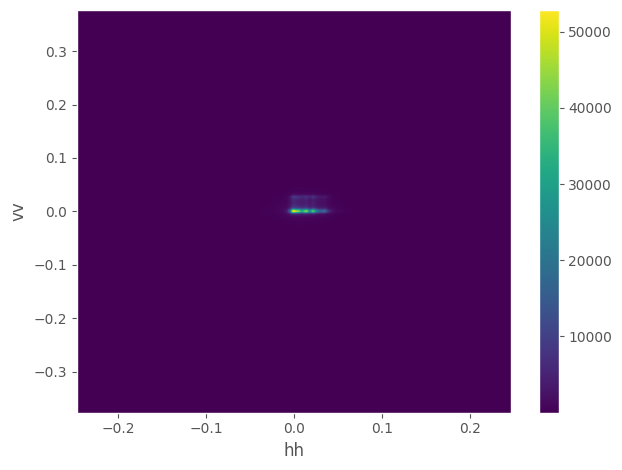

Trial number 66
Trial values: peak_distance 1.028e-03 lwsi 1.636e+01
Trial dw:
{'_DictionaryWrapper__dictionary': {'h_sigma': 0.26698727696033797, 'h_fwhm': 0.014306623436777244, 'h_centroid': 0.001012215202706515, 'h_peak': -0.0009754515979620237, 'v_sigma': 0.2695892579031737, 'v_fwhm': 0.011704572098476529, 'v_centroid': 0.03175582425130272, 'v_peak': -0.00032512700273549627, 'integral_intensity': 37.236096649933934, 'peak_intensity': 58405.72, 'gaussian_fit': {}}}


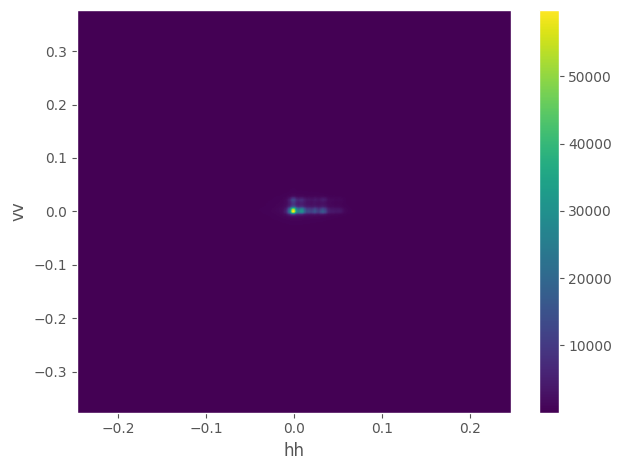

Trial number 96
Trial values: peak_distance 1.379e-03 lwsi 1.634e+01
Trial dw:
{'_DictionaryWrapper__dictionary': {'h_sigma': 0.2670307735316656, 'h_fwhm': 0.03706716072255922, 'h_centroid': 0.005925830868376683, 'h_peak': 0.0009754515979620237, 'v_sigma': 0.268141870695982, 'v_fwhm': 0.02210863618601122, 'v_centroid': 0.03309163103322729, 'v_peak': 0.000975381008206341, 'integral_intensity': 36.509530333067296, 'peak_intensity': 28268.768, 'gaussian_fit': {}}}


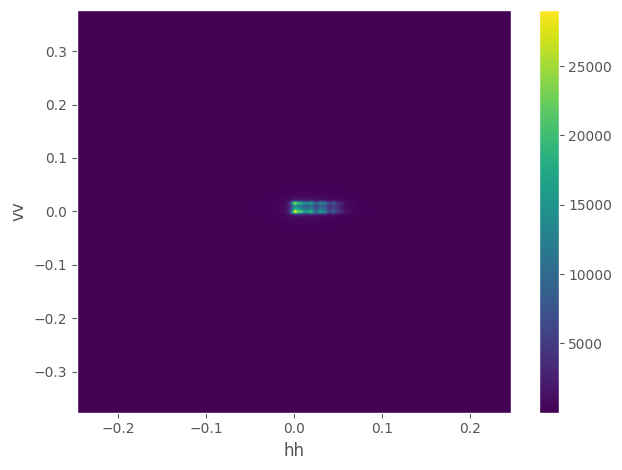

Trial number 130
Trial values: peak_distance 2.299e-03 lwsi 1.621e+01
Trial dw:
{'_DictionaryWrapper__dictionary': {'h_sigma': 0.2592247987066979, 'h_fwhm': 0.021459935155165866, 'h_centroid': 0.007810538182263085, 'h_peak': -0.00032515053265395866, 'v_sigma': 0.2560249884286016, 'v_fwhm': 0.023409144196953058, 'v_centroid': 0.03221293275219807, 'v_peak': 0.0022758890191480305, 'integral_intensity': 34.751775492574424, 'peak_intensity': 30326.582, 'gaussian_fit': {}}}


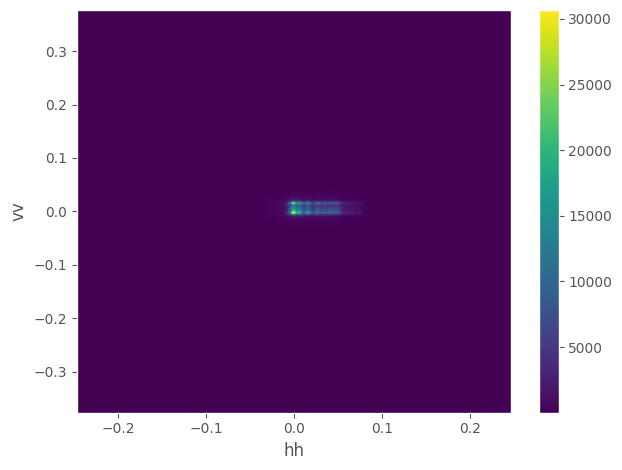

In [51]:
best_hists = []
for t in study.best_trials:
    print("Trial number", t.number)
    print(f"Trial values: peak_distance {t.values[0]:4.3e} lwsi {t.values[1]:4.3e}")
    print("Trial dw:")
    print(t.user_attrs["dw"].__dict__)
    hist = hists[t.number]
    plt.pcolormesh(hist.hh[700:-700], hist.vv[700:-700], hist.data_2D[700:-700,700:-700].T)
    plt.xlabel('hh')
    plt.ylabel('vv')
    plt.tight_layout()
    plt.colorbar()
    plt.show()

Result: Seems like the beam is too spread out in all the cases.

/var/folders/gn/ggsvq37x5sv5bb1j9chn8mmw0000gr/T/ipykernel_86148/1693800501.py:3: ExperimentalWarning: plot_pareto_front is experimental (supported from v2.8.0). The interface can change in the future.
  optuna.visualization.matplotlib.plot_pareto_front(study, target_names=["peak_distance", "lwsi"], include_dominated_trials=False)


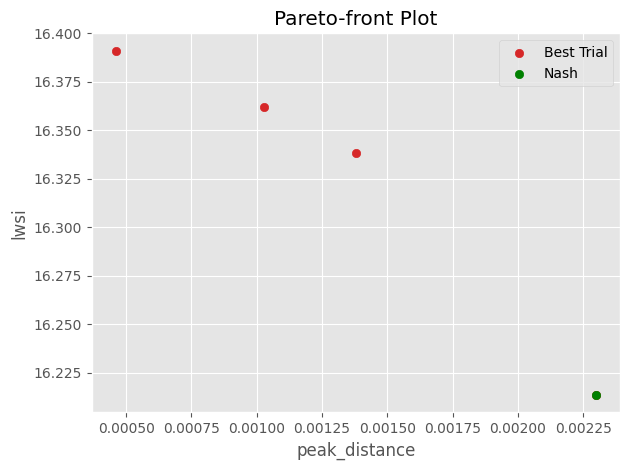

In [52]:
# Generating the pareto front for the multiobjective optimization

optuna.visualization.matplotlib.plot_pareto_front(study, target_names=["peak_distance", "lwsi"], include_dominated_trials=False)
plt.scatter(*nash_trial.values, color='green', label='Nash')
plt.legend(loc='best')
plt.tight_layout()

# plt.savefig(...) to save the image
plt.show()

/var/folders/gn/ggsvq37x5sv5bb1j9chn8mmw0000gr/T/ipykernel_86148/3765395746.py:2: ExperimentalWarning: plot_optimization_history is experimental (supported from v2.2.0). The interface can change in the future.
  optuna.visualization.matplotlib.plot_optimization_history(study, target=lambda t: t.values[0], target_name="peak_distance")


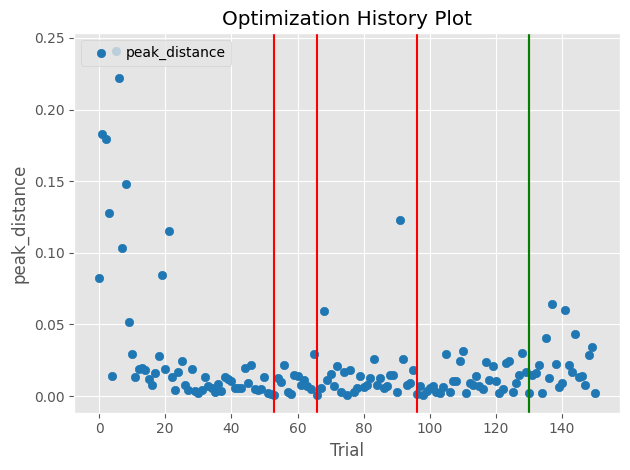

In [53]:
# Plotting the optimization histories
optuna.visualization.matplotlib.plot_optimization_history(study, target=lambda t: t.values[0], target_name="peak_distance")
for t in study.best_trials:
    plt.axvline(t.number, color='red')
plt.axvline(nash_trial.number, color='green')
plt.legend(loc="best")
plt.tight_layout()
plt.show()

/var/folders/gn/ggsvq37x5sv5bb1j9chn8mmw0000gr/T/ipykernel_86148/1916859156.py:2: ExperimentalWarning: plot_optimization_history is experimental (supported from v2.2.0). The interface can change in the future.
  optuna.visualization.matplotlib.plot_optimization_history(study, target=lambda t: t.values[1], target_name="lwsi")


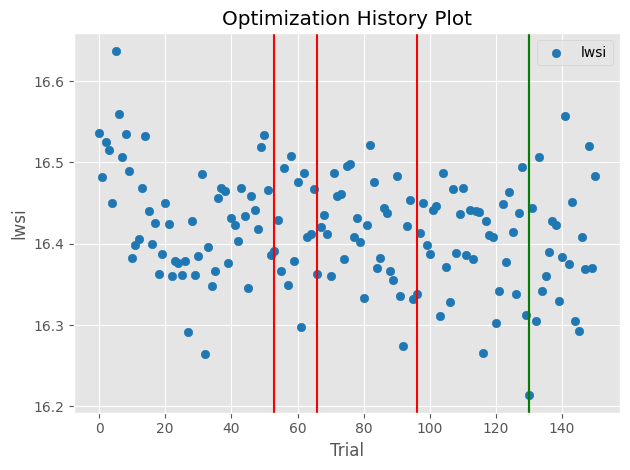

In [54]:
# Plotting the optimization histories
optuna.visualization.matplotlib.plot_optimization_history(study, target=lambda t: t.values[1], target_name="lwsi")
for t in study.best_trials:
    plt.axvline(t.number, color='red')
plt.axvline(nash_trial.number, color='green')
plt.legend(loc="best")
plt.tight_layout()
plt.show()

In [71]:
isums = []
wsums_no_thres = []
wsums_thres = []
for h in hists:
    wsum1 = opt_common._get_weighted_sum_intensity_from_hist(h, crop_distance=0.25)
    isum2, wsum2 = analysis.calculate_weighted_sum(h)
    isums.append((isum1, isum2))
    wsums_no_thres.append(wsum1)
    wsums_thres.append(wsum2)
isums = np.array(isums)
wsums_no_thres = np.array(wsums_no_thres)
wsums_thres = np.array(wsums_thres)
                      

/var/folders/gn/ggsvq37x5sv5bb1j9chn8mmw0000gr/T/ipykernel_86148/214102518.py:2: ExperimentalWarning: plot_optimization_history is experimental (supported from v2.2.0). The interface can change in the future.
  optuna.visualization.matplotlib.plot_optimization_history(study, target=lambda t: np.log(wsums_no_thres[t.number]),


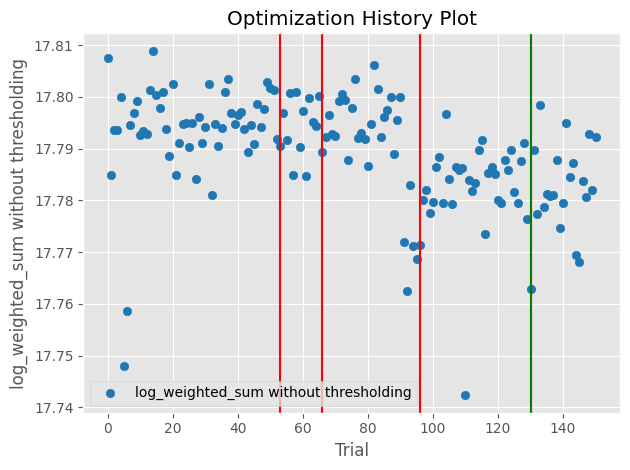

In [72]:
# Plotting the optimization histories
optuna.visualization.matplotlib.plot_optimization_history(study, target=lambda t: np.log(wsums_no_thres[t.number]),
                                                          target_name="log_weighted_sum without thresholding")
for t in study.best_trials:
    plt.axvline(t.number, color='red')
plt.axvline(nash_trial.number, color='green')
plt.legend(loc="best")
plt.tight_layout()
plt.show()

In [73]:
indices = np.argsort(wsums_no_thres)

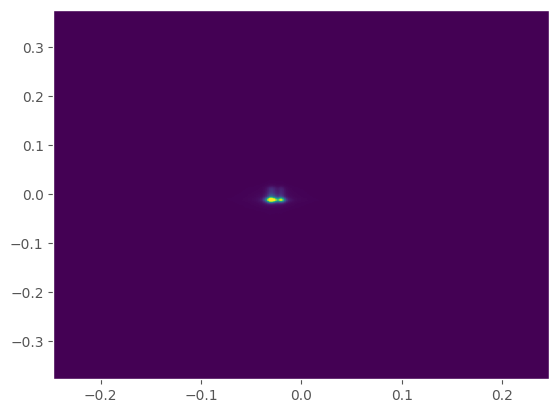

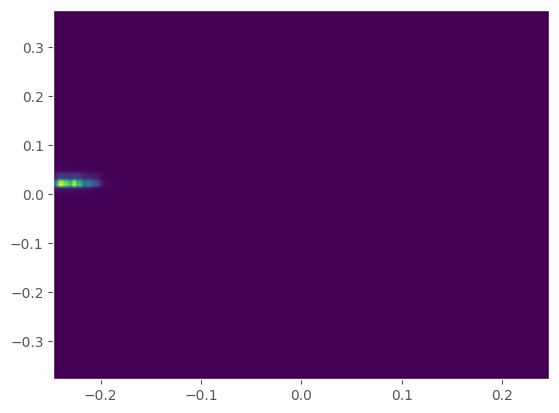

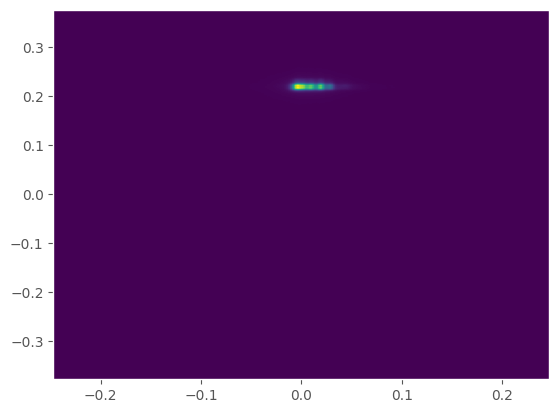

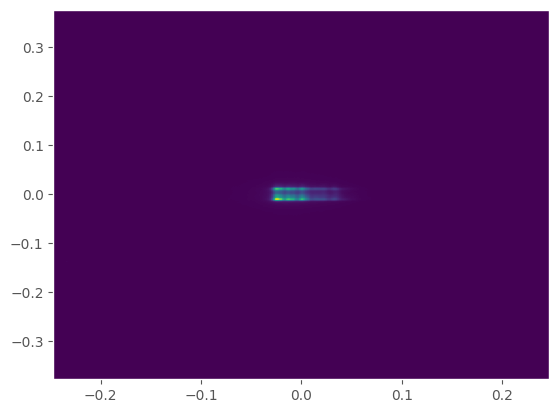

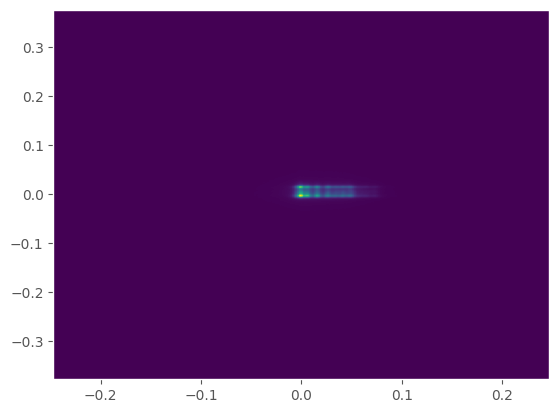

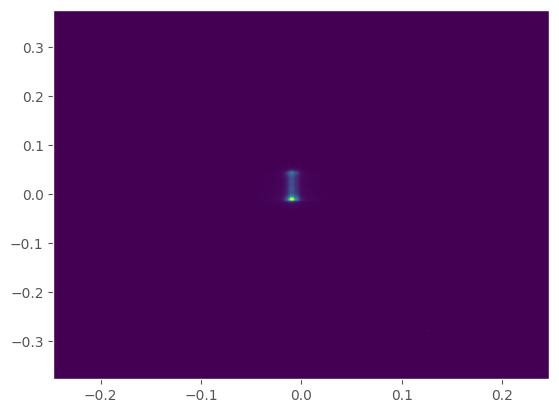

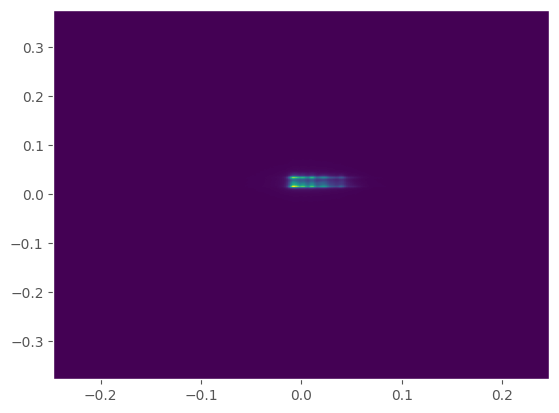

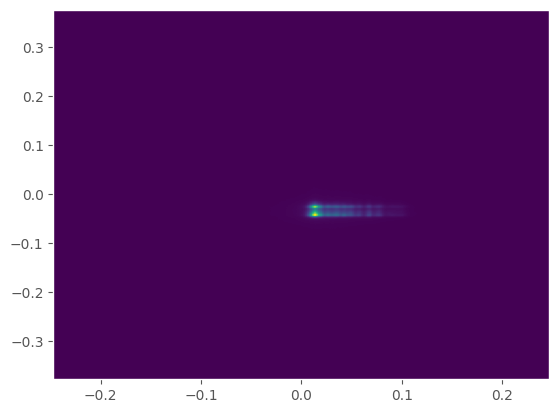

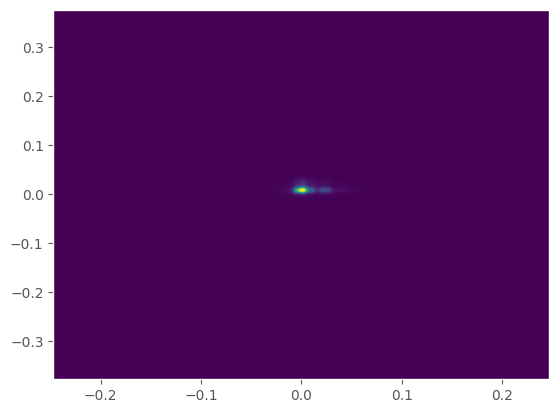

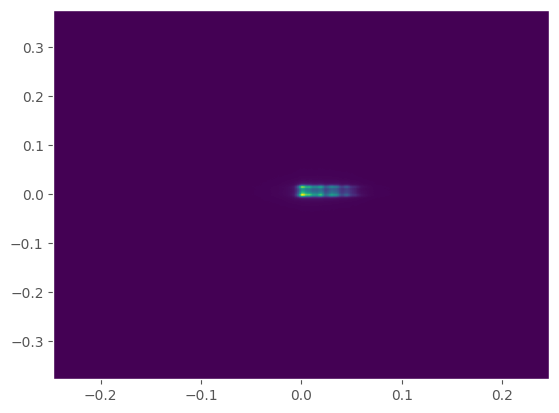

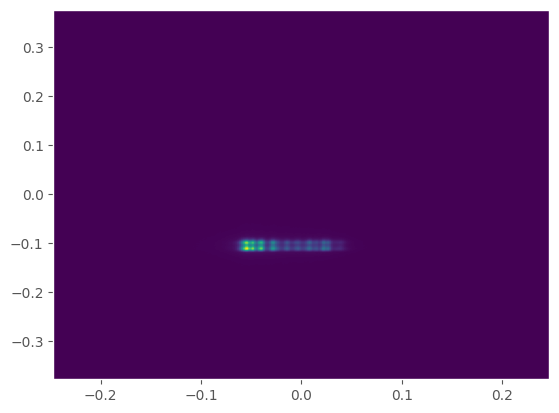

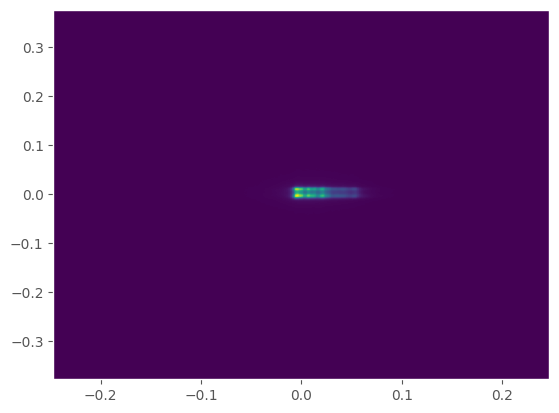

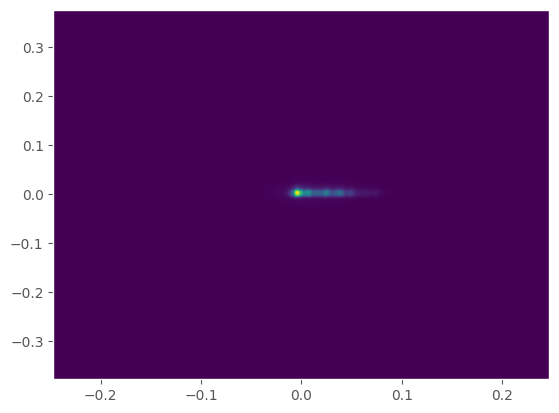

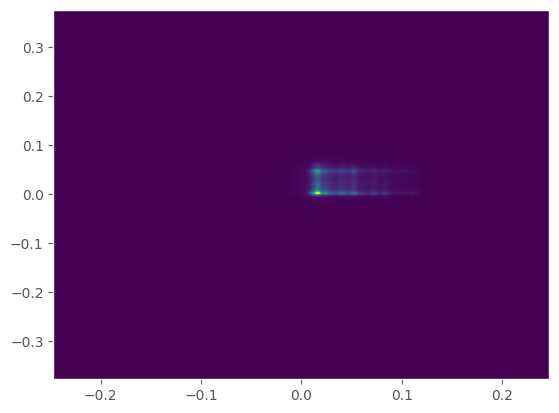

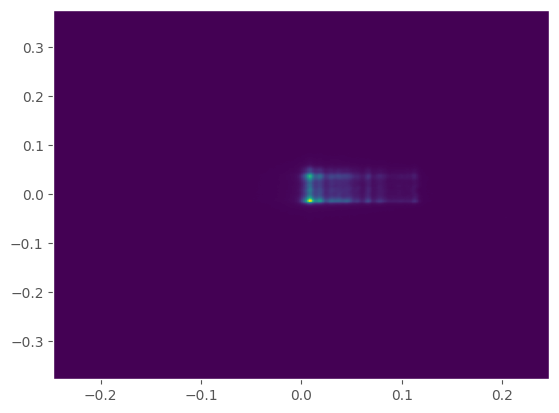

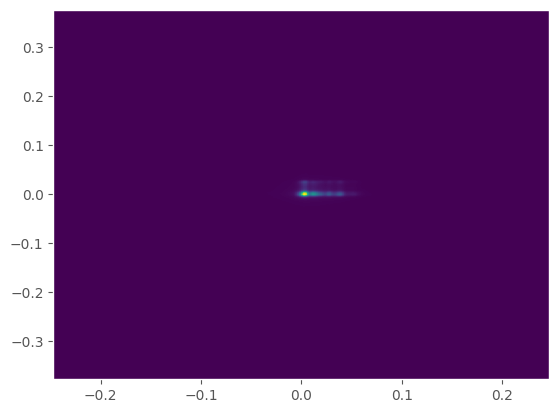

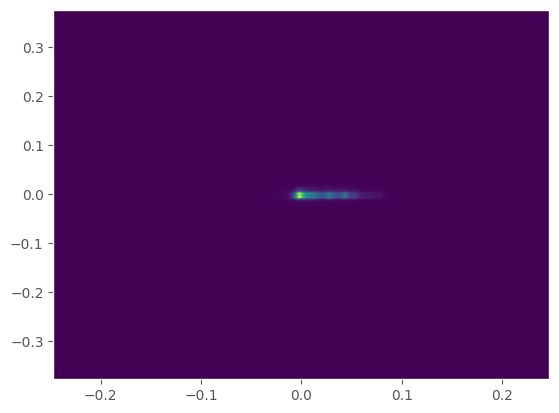

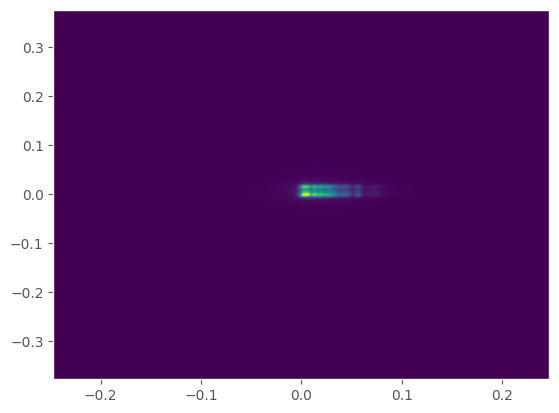

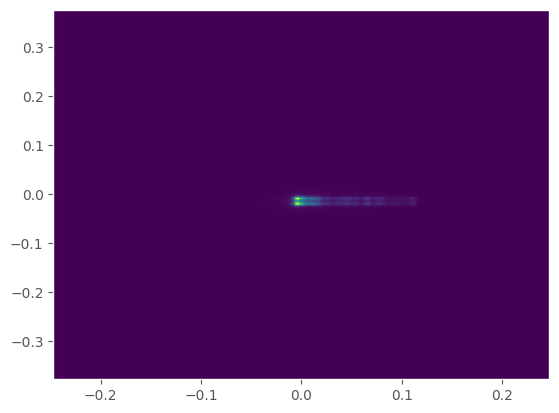

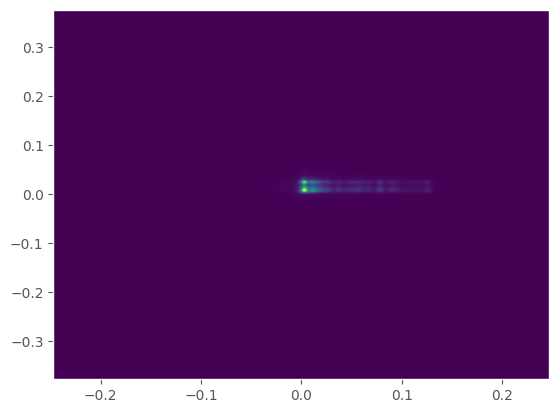

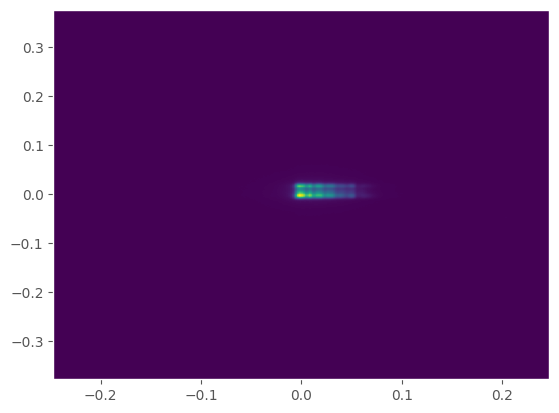

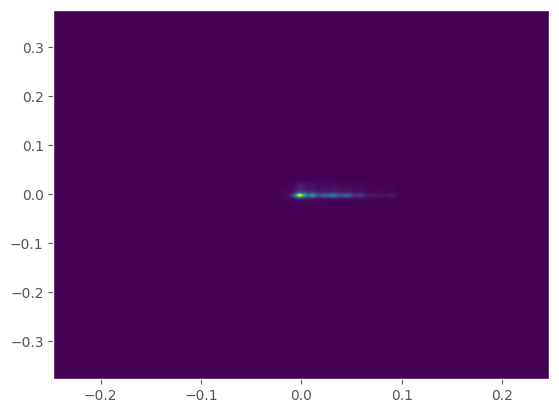

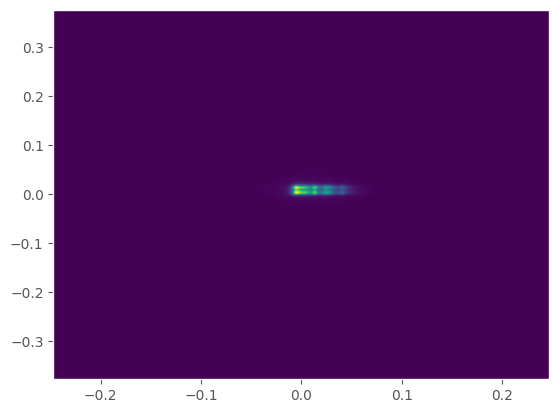

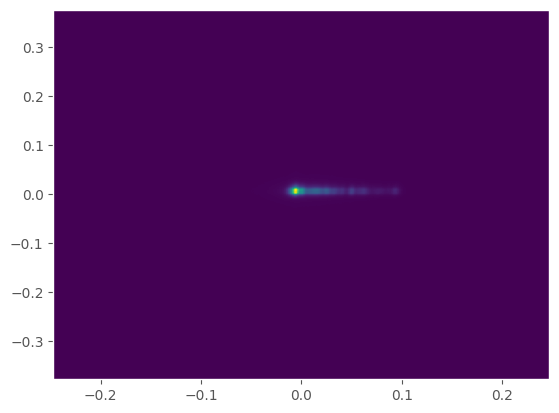

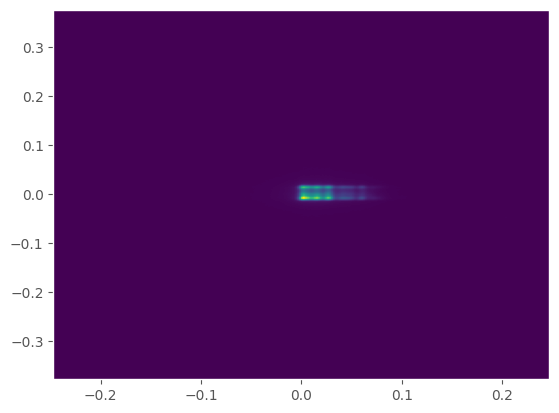

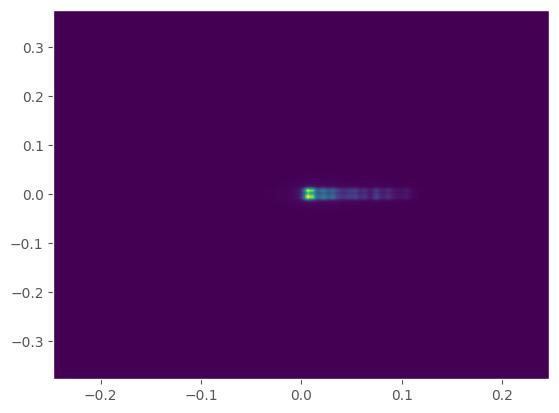

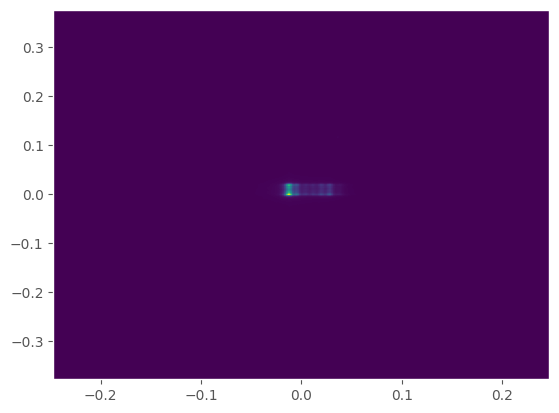

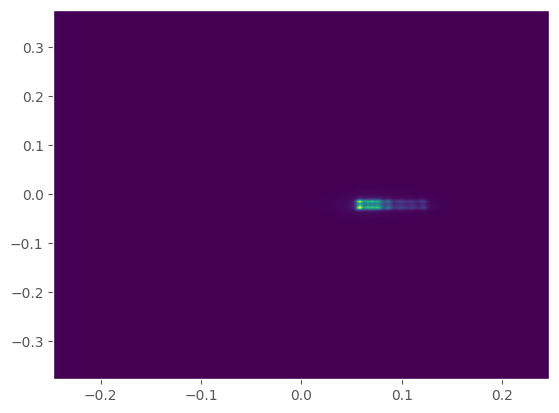

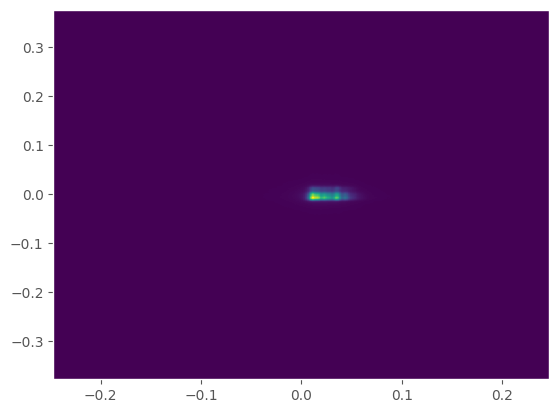

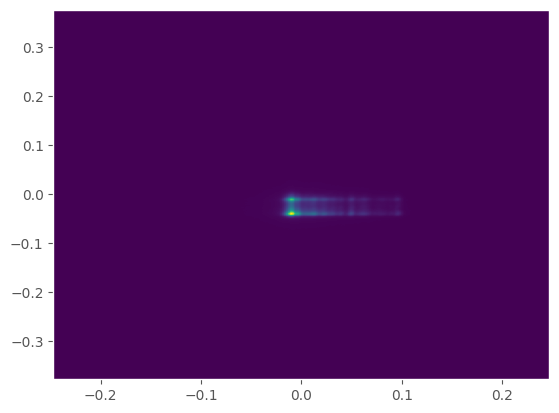

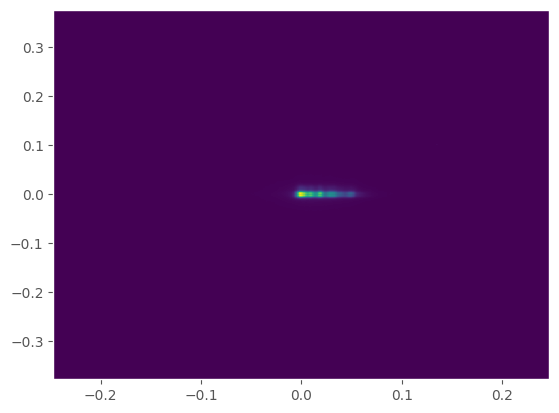

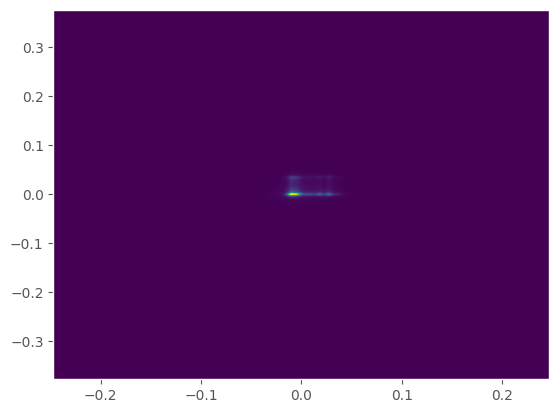

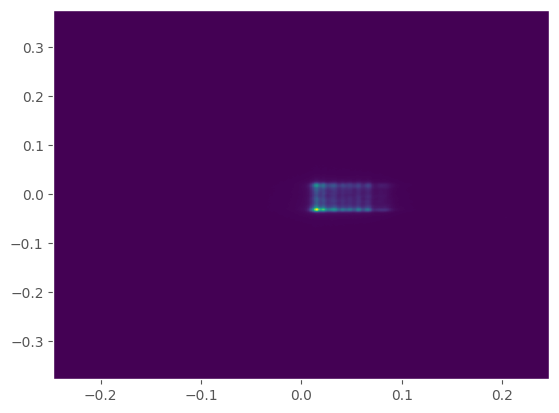

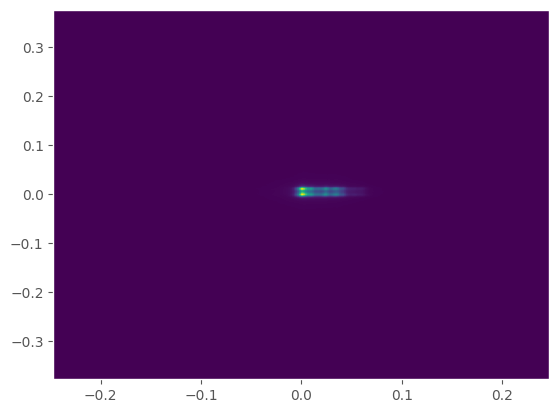

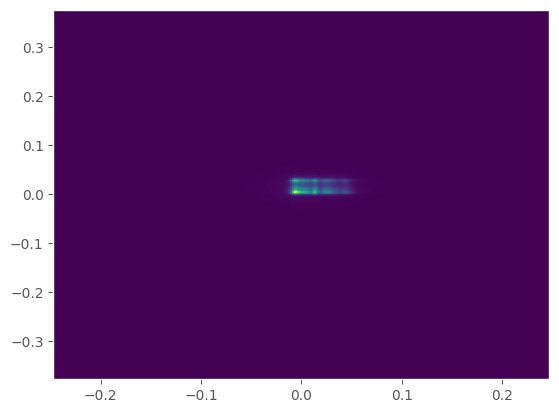

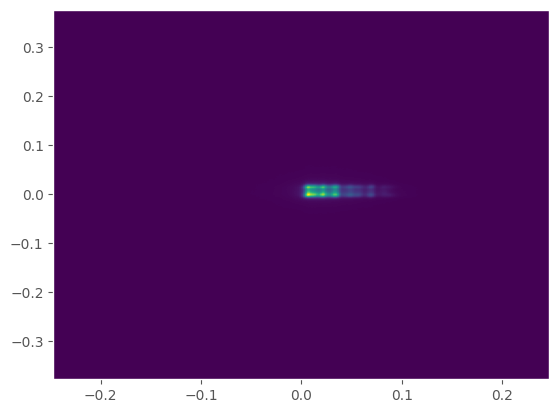


KeyboardInterrupt



In [74]:
for idx in indices[:50]:
    plt.pcolormesh(hists[idx].hh[700:-700],hists[idx].vv[700:-700][:,None], hists[idx].data_2D[700:-700,700:-700].T)
    plt.show()

/var/folders/gn/ggsvq37x5sv5bb1j9chn8mmw0000gr/T/ipykernel_86148/2958963105.py:2: ExperimentalWarning: plot_optimization_history is experimental (supported from v2.2.0). The interface can change in the future.
  optuna.visualization.matplotlib.plot_optimization_history(study, target=lambda t: np.log(wsums_thres[t.number]),


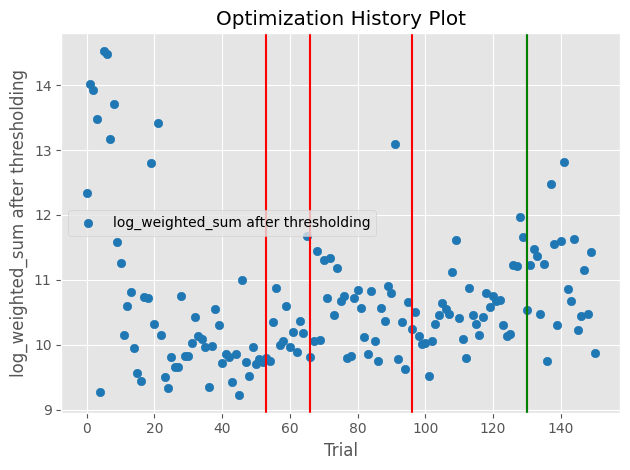

In [75]:
# Plotting the optimization histories
optuna.visualization.matplotlib.plot_optimization_history(study, target=lambda t: np.log(wsums_thres[t.number]),
                                                          target_name="log_weighted_sum after thresholding")
for t in study.best_trials:
    plt.axvline(t.number, color='red')
plt.axvline(nash_trial.number, color='green')
plt.legend(loc="best")
plt.tight_layout()
plt.show()

In [76]:
test_val_fns = [lambda t: t.values[0], lambda t: np.log(wsums_no_thres[t.number])]
test_values = []
for t in study.trials:
    test_values.append([vf(t) for vf in test_val_fns])


test_pareto = analysis.get_pareto_front_trials(study.trials, study.directions, values_fns=test_val_fns)
domins = analysis.calculate_dominated_trials(study.trials, study.trials, [1,1], test_val_fns)
print(np.argmax(domins))

130


53 [0.00045981565522817996, 17.790595889950918]


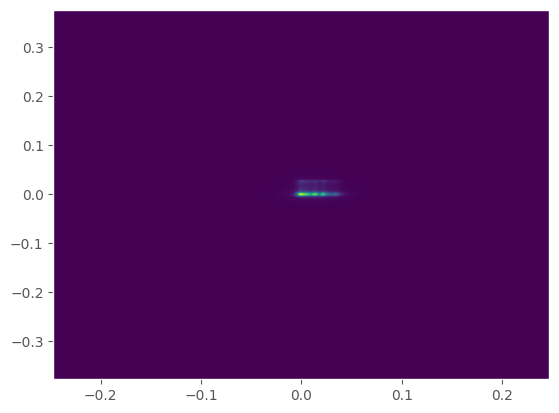

92 [0.02614557710377724, 17.76256367805337]


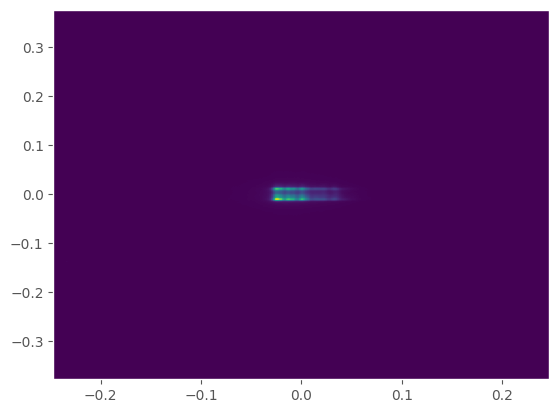

96 [0.0013794469656845396, 17.771321402464366]


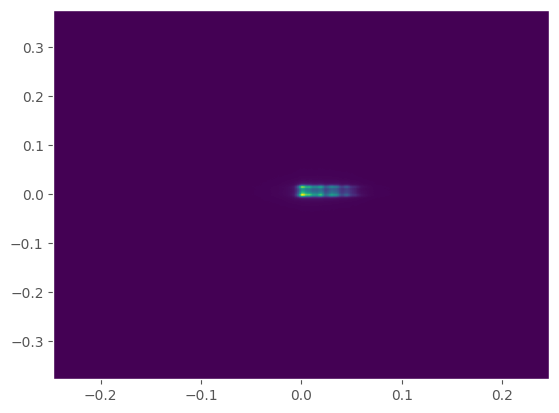

98 [0.001028208825032363, 17.78207492111222]


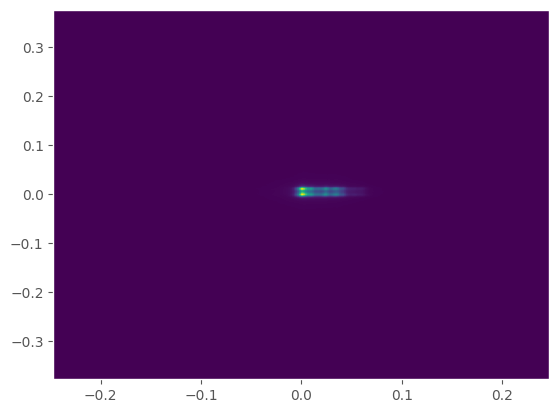

110 [0.031473903772645286, 17.74227148988711]


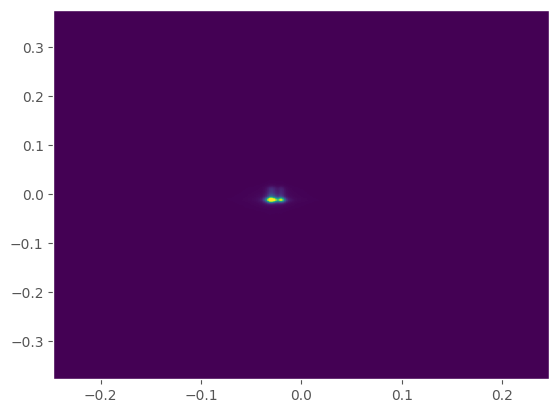

130 [0.0022989984115618124, 17.762926074168522]


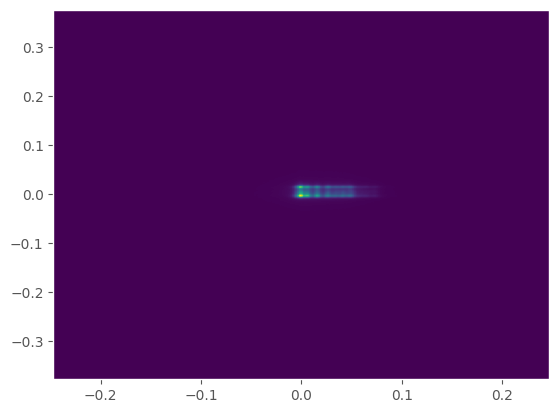

In [77]:
for t in test_pareto:
    print(t.number, test_values[t.number])
    hdata = hists[t.number]
    
    plt.pcolormesh(hdata.hh[700:-700], hdata.vv[700:-700][:,None], hdata.data_2D[700:-700,700:-700].T)
    plt.show()

In [34]:
test_val_fns = [lambda t: t.values[0], lambda t: opt_common._get_fwhm_from_dw(t.user_attrs['dw']), lambda t: np.log(wsums_thres[t.number])]
test_values = []
for t in study.trials:
    test_values.append([vf(t) for vf in test_val_fns])


test_pareto = analysis.get_pareto_front_trials(study.trials, [1, 1, 1], values_fns=test_val_fns)

domins = analysis.calculate_dominated_trials(study.trials, study.trials, [1,1, 1], test_val_fns)
print(np.argmax(domins), domins[np.argmax(domins)])

66 110


4 [0.013863171097148753, 0.0337463645588529, 9.267892465871622]


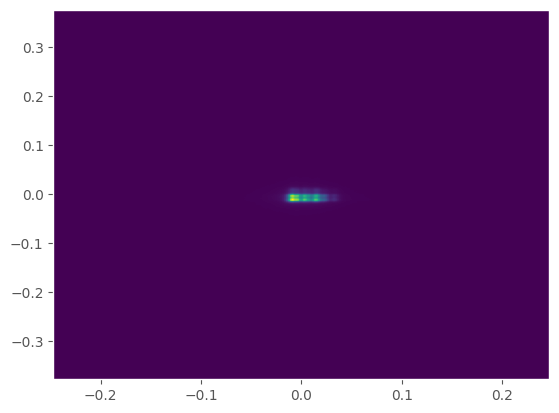

16 [0.008030205619341584, 0.034618437128775326, 9.447853547654326]


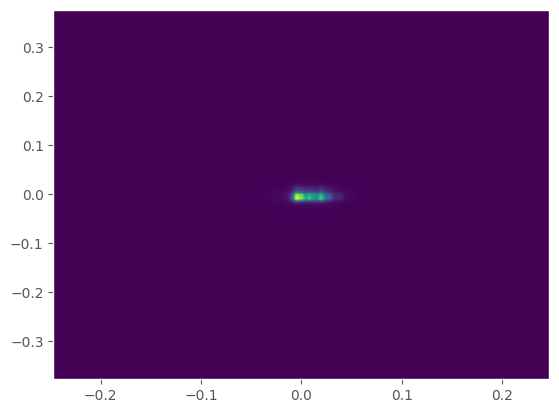

23 [0.004138340897053516, 0.034027113941126376, 9.50221341436024]


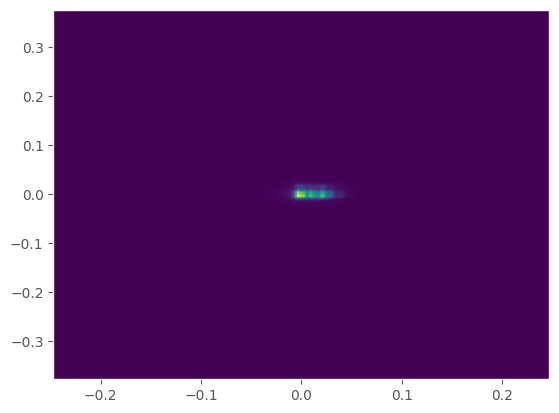

36 [0.00813526278746714, 0.03347589310621706, 9.342136310013602]


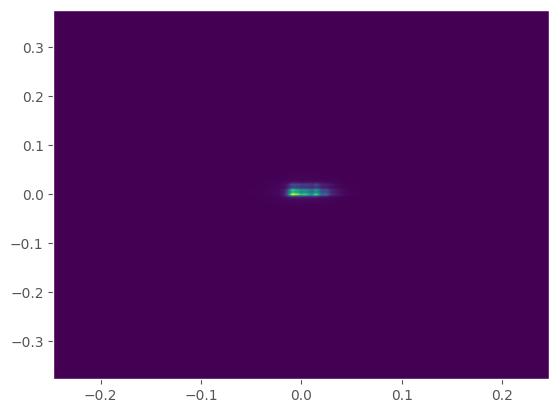

43 [0.005977603517966235, 0.03492850602433706, 9.430433883706828]


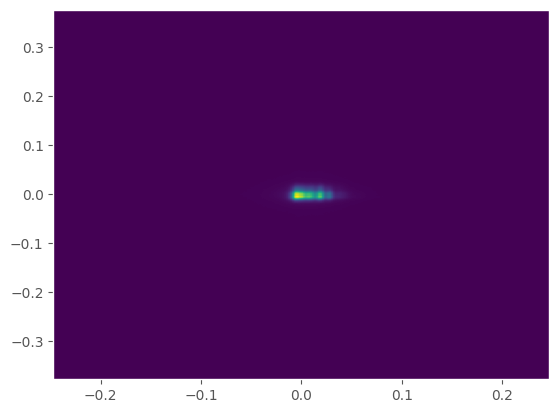

45 [0.008880732445585527, 0.034070663472190364, 9.217443276807687]


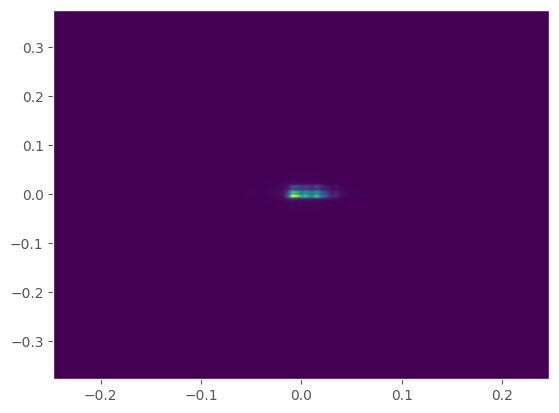

48 [0.004239225907192193, 0.0337463645588529, 9.518086815408411]


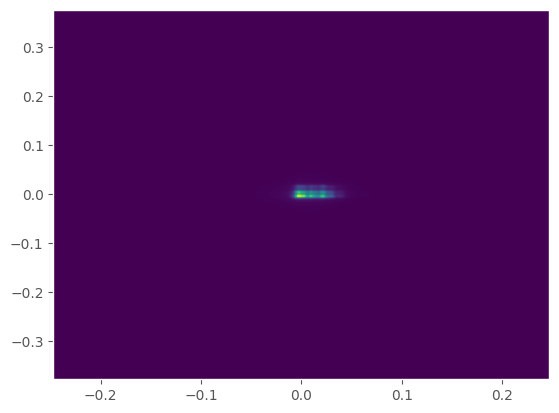

52 [0.001657833546101169, 0.0333241540611373, 9.729256785143063]


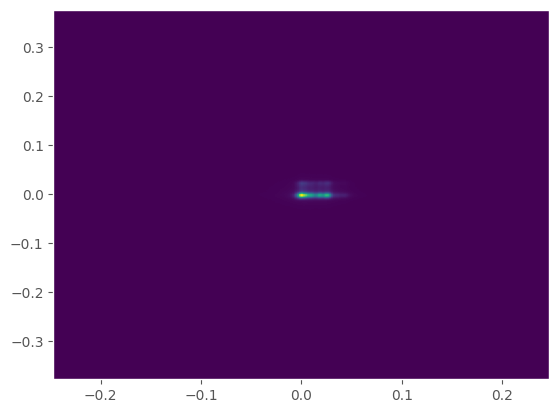

53 [0.00045981565522817996, 0.029493734241603307, 9.797965158401567]


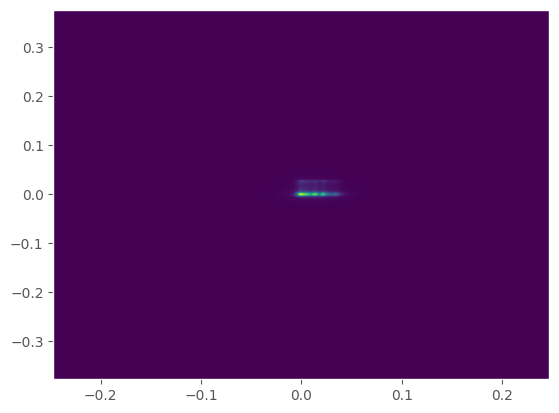

58 [0.001657944296421764, 0.01731520387632536, 10.057910164491341]


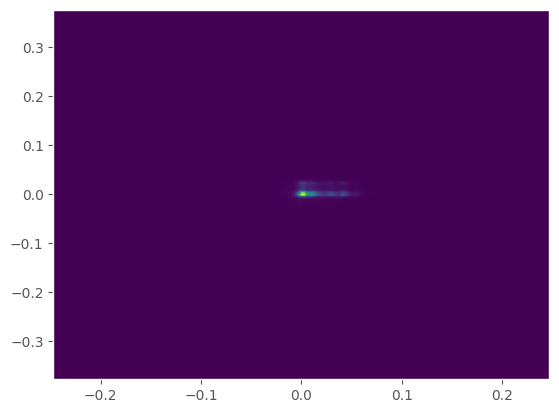

66 [0.001028208825032363, 0.01848449301901946, 9.80651598179111]


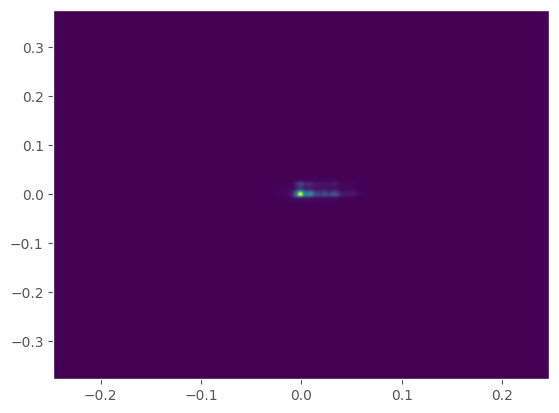

75 [0.00045981565522817996, 0.028403678839807187, 10.677523540170258]


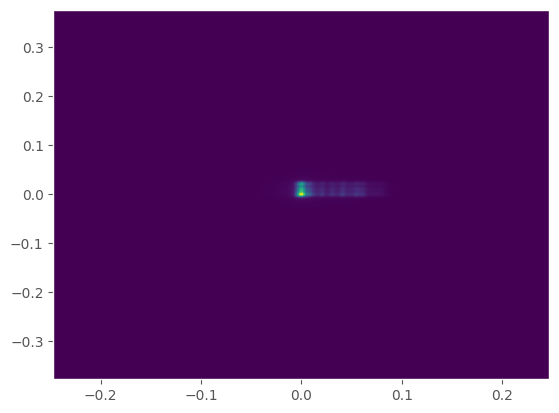

77 [0.0029441528271152728, 0.025725818812007775, 9.789392584745785]


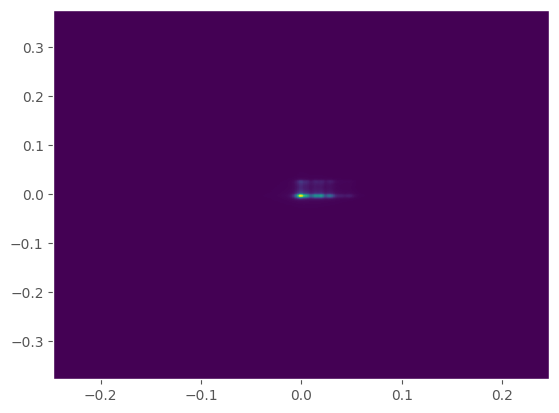

86 [0.005977757099054596, 0.02744382621915484, 9.730495416942103]


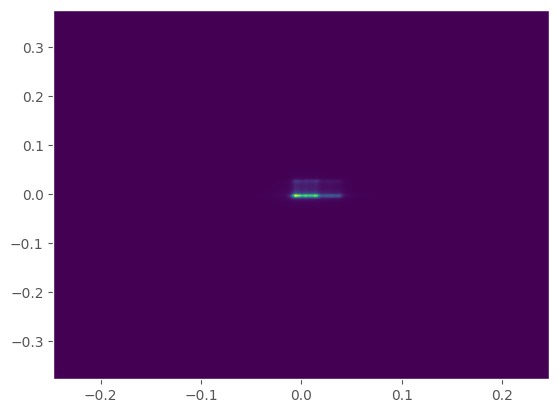

99 [0.0035914028878718763, 0.016060929506698057, 10.010198240717484]


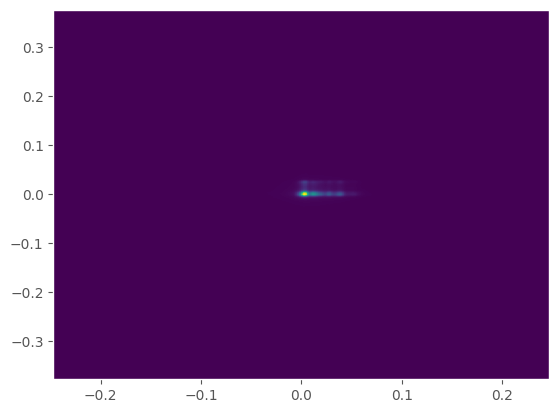

101 [0.006897474413837011, 0.015511310970346229, 9.519755672417723]


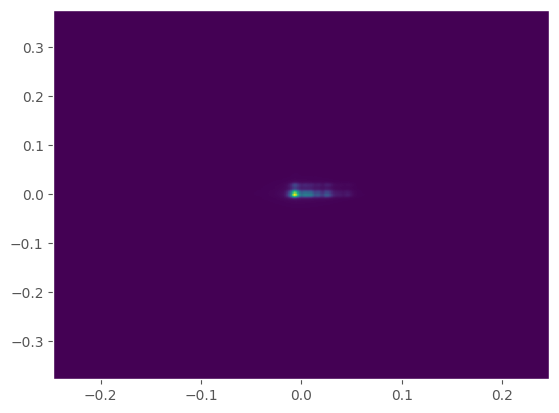

112 [0.009479678309078237, 0.012508592584035905, 9.790009224513051]


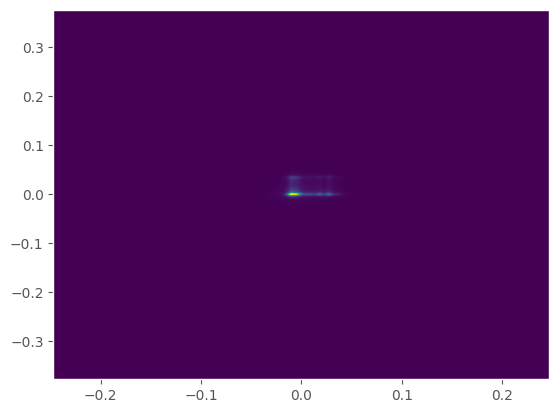

122 [0.004800520758394894, 0.01587549443185906, 10.682687990151091]


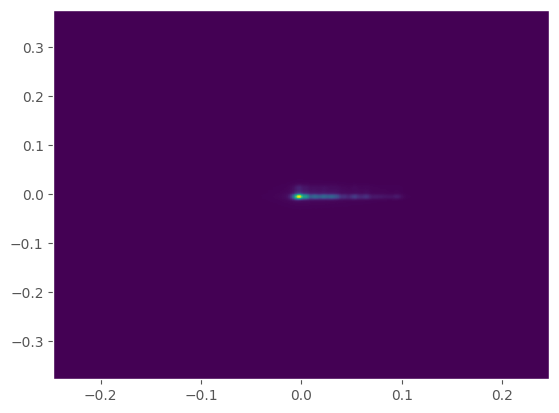

In [35]:
for t in test_pareto:
    print(t.number, test_values[t.number])
    hdata = hists[t.number]
    
    plt.pcolormesh(hdata.hh[700:-700], hdata.vv[700:-700][:,None], hdata.data_2D[700:-700,700:-700].T)
    plt.show()